# Input Distributions

**Goal:** PF made some samples comparing the usual tracks with pseudo-tracks, the "perfect" tracks that we could have if everything was magical :)


In [1]:
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec

import numpy as np
import pandas as pd
import xarray as xr

import os
import sys
import h5py
sys.path.append("../..")
from root_to_np import getdR, passJet
from usefulFcts import VR, ftag_cone, getTrkMask, strToList
from trainNet import DIPS
from plottingFcts import trainingMetrics, sigBkgEff, getEffs, plotROCRatio

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Open the files

In [2]:
fDir = "../../../public/PF_Ntuples/"

fnames = {
    'pseudo' : 'user.pbutti.427081.Pythia8EvtGen_A14NNPDF23LO_flatpT_Zprime_Extended.FlavourTagPerformanceTools_PT_v01_Akt4EMTo/user.pbutti.17774615.Akt4EMTo._000001.root',
    'normal' : 'user.pbutti.427081.Pythia8EvtGen_A14NNPDF23LO_flatpT_Zprime_Extended.FlavourTagPerformanceTools_v02_Akt4EMTo/user.pbutti.17773333.Akt4EMTo._000001.root',
    }

PT_tree  = uproot.open(fDir + fnames['pseudo'])["bTag_AntiKt4EMTopoJets"]
trk_tree = uproot.open(fDir + fnames['normal'])["bTag_AntiKt4EMTopoJets"]

In [3]:
for c in PT_tree.keys():
    print(c)

b'runnb'
b'eventnb'
b'mcchan'
b'mcwg'
b'avgmu'
b'actmu'
b'PVx'
b'PVy'
b'PVz'
b'truth_PVx'
b'truth_PVy'
b'truth_PVz'
b'njets'
b'jet_pt'
b'jet_eta'
b'jet_phi'
b'jet_E'
b'jet_pt_orig'
b'jet_eta_orig'
b'jet_phi_orig'
b'jet_E_orig'
b'jet_LabDr_HadF'
b'jet_DoubleHadLabel'
b'jet_JVT'
b'jet_m'
b'jet_nConst'
b'jet_dRiso'
b'jet_truthMatch'
b'jet_isPU'
b'jet_aliveAfterOR'
b'jet_aliveAfterORmu'
b'jet_isBadMedium'
b'jet_truthPt'
b'jet_dRminToB'
b'jet_dRminToC'
b'jet_dRminToT'
b'jet_dl1_pb'
b'jet_dl1_pc'
b'jet_dl1_pu'
b'jet_dl1mu_pb'
b'jet_dl1mu_pc'
b'jet_dl1mu_pu'
b'jet_dl1rnn_pb'
b'jet_dl1rnn_pc'
b'jet_dl1rnn_pu'
b'jet_mv2c10'
b'jet_mv2c10mu'
b'jet_mv2c10rnn'
b'jet_mv2c100'
b'jet_mv2cl100'
b'jet_ip2d_pb'
b'jet_ip2d_pc'
b'jet_ip2d_pu'
b'jet_ip2d_llr'
b'jet_ip3d_pb'
b'jet_ip3d_pc'
b'jet_ip3d_pu'
b'jet_ip3d_llr'
b'jet_ip2'
b'jet_ip2_c'
b'jet_ip2_cu'
b'jet_ip2_nan'
b'jet_ip2_c_nan'
b'jet_ip2_cu_nan'
b'jet_ip3'
b'jet_ip3_c'
b'jet_ip3_cu'
b'jet_ip3_nan'
b'jet_ip3_c_nan'
b'jet_ip3_cu_nan'
b'jet_rnnip_pb'

In [4]:
PT_tree.array(b'jet_pt')[0]

array([1570620.    , 1401963.9   ,   41086.832 ,   32326.604 ,
         28531.023 ,   21155.56  ,   19372.31  ,   25519.475 ,
         24373.809 ,   21019.805 ,   16794.895 ,   18382.754 ,
         15639.251 ,   17880.166 ,   14077.4375,   13192.97  ,
         15683.826 ,   12248.272 ,   12322.642 ,   13836.019 ,
         10621.613 ,   13455.371 ,   14810.515 ,   13473.167 ,
          6175.9067,   10679.745 ,    7762.99  ,    6926.6396],
      dtype=float32)

In [5]:
PT_tree.array(b'jet_nBHadr')[0]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [6]:
PT_tree.array(b'jet_nCHadr')[0]

array([4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
PT_tree.array(b'jet_bH_pt')[0]

[[85260.0, 66670.766],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0]]

In [8]:
PT_tree.array(b'jet_bH_Lxy')[0]

[[0.6722542, 6.9826083],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0],
 [-99.0]]

In [9]:
PT_tree.array(b'jet_cH_pt')[0][:2]

[[470454.12, 48271.61, 17438.168, 29265.904], [972045.75]]

In [10]:
PT_tree.array(b'jet_cH_Lxy')[0][:2]

[[50.10153, 5.392213, 8.415549, 7.560253], [3.8625853]]

In [11]:
PT_tree.array(b'bH1_pt')[0]

array([-999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999.], dtype=float32)

I was also curious what mc campaign this was, so I can find this out by looking at the $\mu$ of the samples.

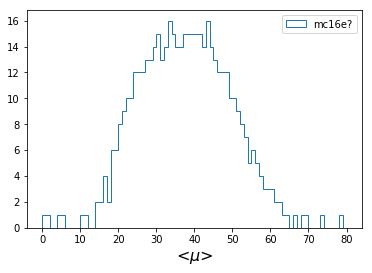

In [12]:
plt.hist(PT_tree.array(b'avgmu'),bins=80,range=(0,80),color='C0',
         histtype='step',label='mc16e?')
plt.xlabel('<$\mu$>',fontsize=16)
plt.legend()
plt.show()

I think the first step here is just to sanity check what some of the jet level quantities look like, such as $p_T$ and $\eta$ and the track multiplicities, before we make any of the relevant cuts.

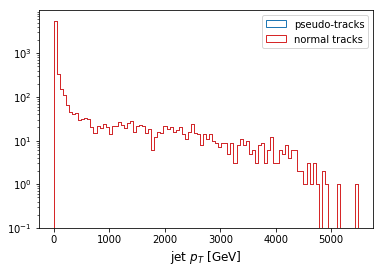

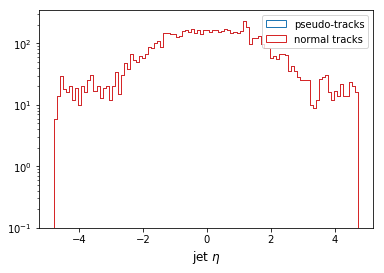

In [13]:
for var, xlabel, f in zip([b'jet_pt', b'jet_eta'], 
                          ['jet $p_T$ [GeV]','jet $\eta$'], 
                          [0.001, 1]):

    for myTree, c, label in zip([PT_tree,trk_tree],['C0','C3'], ['pseudo-tracks','normal tracks']):

        myVar = np.concatenate(myTree.array(var),axis=0) * f

        plt.hist(myVar,100,histtype='step',color=c,label=label,log=True)

    plt.legend()
    plt.xlabel(xlabel,fontsize=12)
    plt.show()

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


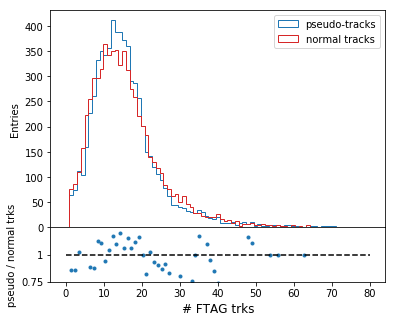

In [14]:
fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(5,1)
ax1 = fig.add_subplot(gs[:4,0])
ax2 = fig.add_subplot(gs[4:,0],sharex=ax1)
fig.subplots_adjust(hspace=0)

ns = []

for myTree, c, label in zip([PT_tree,trk_tree],['C0','C3'], ['pseudo-tracks','normal tracks']):

    myVar = np.concatenate(myTree.array(b'jet_btag_ntrk'),axis=0) 

    n, edg, _ = ax1.hist(myVar,80,(1,80),histtype='step',color=c,label=label)
    ns.append(n)

ax1.legend()
ax1.set_ylabel('Entries')
    
ax2.plot(0.5 * (edg[:-1]+edg[1:]), ns[0] / ns[1],marker='.',linewidth=0)
ax2.set_xlabel('# FTAG trks',fontsize=12)
ax2.set_ylabel('pseudo / normal trks',fontsize=10)

yticks = [0.75,1]
ax2.set_yticks(yticks)
ax2.set_yticklabels([str(yi) for yi in yticks])

ax2.set_ylim(0.75,1.25)
ax2.plot([0,80],[1]*2,'k--')
    
plt.show()

This is before any cuts though.

## Let's look at the IP3D inputs after I make all the standard cuts for training


I might try to clean up my notebook a bit and open the X and y variables in a for loop.

In [15]:
pdg_to_class = {0:0, 4:1, 5:2, 15:3}

nTrks = 60
dataDir = '../../data'
df_tag = '200ktrain_{}trks_sd0_rev'.format(nTrks)
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTrain = '200ktrain_{}trks_{}_sd0_rev'.format(nTrks,vStr)


In [16]:
masks = []
y_trks_list = []

jet_dfs = []
trk_xrs = []

for tag in ['PT','NT']:

    subDir = 'mu40_Topo_Zprime_5TeV_2lead_'+tag
    jdf = pd.read_hdf('{}/{}/jet_{}.h5'.format(dataDir,subDir,df_tag), key='jet_df')
    txr = xr.open_dataarray('{}/{}/trk_{}.nc'.format(dataDir,subDir,df_tag))
    
    X = txr.values
    y = jdf.LabDr_HadF.replace(pdg_to_class).values

    
    '''
    Add new columns to the df for the amount of tracks of each type
    '''
    trk_origs = txr.loc[:,:,'orig'].values
    for o, orig_tag in zip([(0,1), 2, -1, 3], ['HF','frag','PU','GEANT']):

        if type(o) == tuple:
            orig_mask = np.zeros(nTrks, dtype=np.bool)
            for oi in o:
                orig_mask = orig_mask | (trk_origs == oi)

            # For this jet, I can't just *add* up the origin mask, b/c the b-jets have 
            # this variable assigned as the mask values
            trkExists = (np.sum(X, axis=-1) != 0)

            orig_mask = orig_mask & trkExists

        else:
            orig_mask = (trk_origs == o)

        key = 'ntrk_' + orig_tag
        jdf[key] = np.sum(orig_mask, axis=-1)
    
    # Get the mask since all of the truth labels are track level variables
    y_trks = np.ones_like(X[:,:,0])
    y_trks = y_trks * y.reshape(-1,1)

    # This mask selects the non-masked tracks in the jet
    mask = getTrkMask(X)
    y_trks = y_trks[mask]

    masks.append(mask)
    y_trks_list.append(y_trks)
    
    jet_dfs.append(jdf)
    trk_xrs.append(txr)


mask_PT, mask_NT = masks
ytrks_PT, ytrks_NT = y_trks_list   

jdf_PT, jdf_NT = jet_dfs
txr_PT, txr_NT = trk_xrs


In [17]:
myVars = ['sd0', 'sz0', 'ip3d_d0', 'ip3d_z0', 'ip3d_grade', 
          'pt', 'eta', 'theta', 'phi', 'orig', 
          'nInnHits', 'nsharedBLHits', 'nsplitBLHits', 'nNextToInnHits', 
          'nPixHits', 'nPixHoles', 'nsharedPixHits', 'nsplitPixHits', 
          'nSCTHits', 'nSCTHoles', 'nsharedSCTHits', 'ptfrac', 'dr']

In [18]:
xlabels = ['$s_{d0}$', '$s_{z0}$', '$d_0$', r'$z_0 \sin (\theta)$', 'IP3D grade', 
           '$p_T$', '$\eta$', r'$\theta$', '$\phi$', 'trk origin', 
           'IBL hits', 'IBL shared hits', 'IBL split hits', 'PIX1 hits', 
           'pixel hits', 'pixel holes', 'shared pixel hits', 'split pixel hits',
           'SCT hits', 'SCT holes', 'shared SCT hits', '$p_T^{frac}$', '$\Delta R$']

var_bins = [50, 50, 50, 50, 14,
            50, 50, 50, 50, 5,
            5, 5, 5, 5,
            10, 10, 10, 10,
            21, 10, 10, 50, 50]

var_ranges = [(-10,10), (-15,15), (-1,1), (-1.5,1.5), (-0.5,13.5),
              (0,100), (-2.5,2.5), (0,np.pi), (-np.pi, np.pi), (-1.5,3.5),
              (-0.5,4.5), (-0.5,4.5), (-0.5,4.5), (-0.5,4.5),
              (-0.5,9.5), (-0.5,9.5), (-0.5,9.5), (-0.5,9.5),
              (-0.5,20.5), (-0.5,9.5), (-0.5,9.5), (0,0.5), (0, .4)]

**Note:** I'm splitting the distributions up by the the jet flavor, since the separation of these variables based on jet flavor is how we get good $b$-tagging performance. 

In [19]:
# Also - some of the variables are categorical, so I'll want more descriptive xlabels 
catLabels = {'ip3d_grade' : ['No hits in first two layers; exp. hit in L0 and L1',
                             'No hits in first two layers; exp. hit in L0 and no exp. hit in L1',
                             'No hits in first two layers; no exp. hit in L0 and exp. hit in L1',
                             'No hits in first two layers; no exp. hit in L0 and L1',
                             'No hit in L0; exp hit in L0',
                             'No hit in L0; no exp. hit in L0',
                             'No hit in L1; exp hit in L1',
                             'No hit in L1; no exp hit in L1',
                             'Shared hit in both L0 and L1',
                             'Shared pixel hits',
                             'Two or more shared SCT hits',
                             'Split hits in both L0 and L1',
                             'Split pixel hit',
                             'Good: a track not in any of the above categories'],
             'orig' : ['no truth link OR $P_{match} < 0.75$',
                      'b-hadron tracks',
                      'c-hadron tracks',
                      'fragmentation + PU',
                      'GEANT']}

figDir = "../../figures/mu40_Topo_Zprime_5TeV_2lead_PT/RNNIP_inputs"

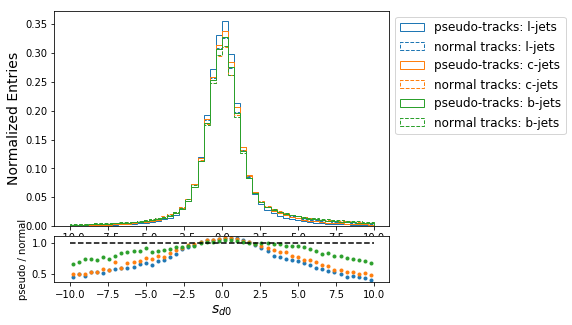

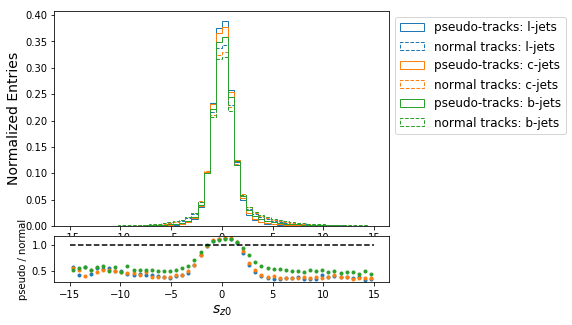

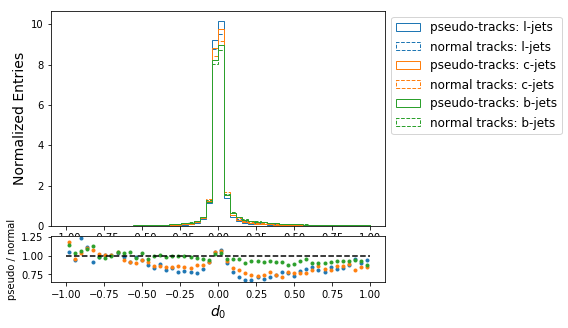

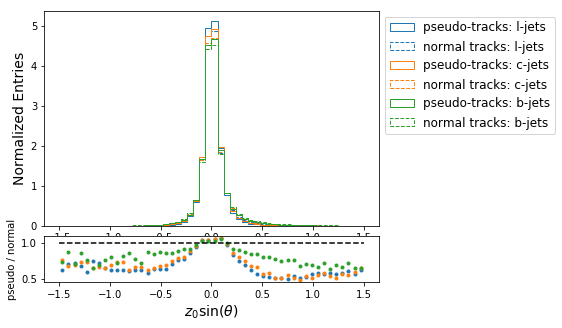

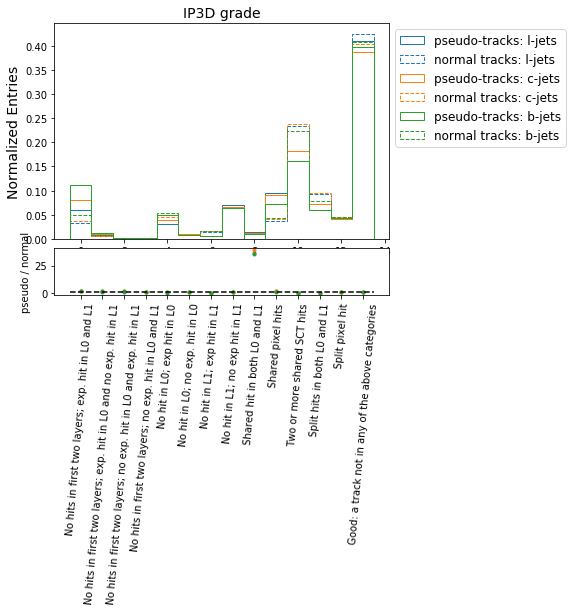

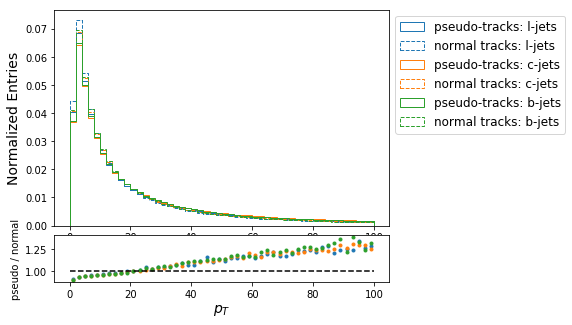

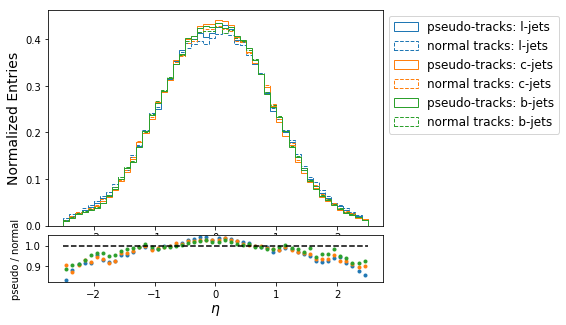

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


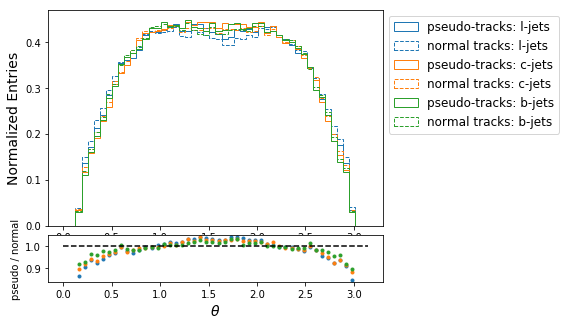

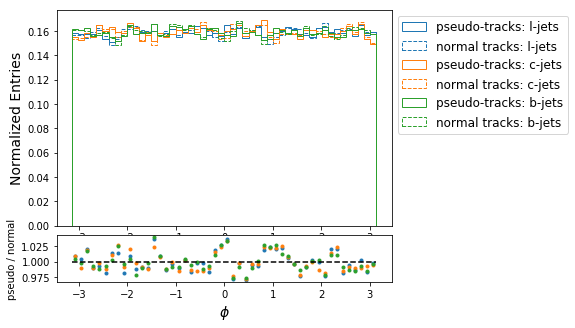

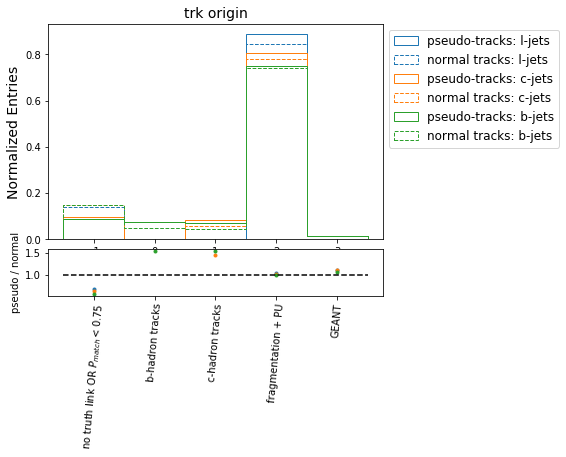

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


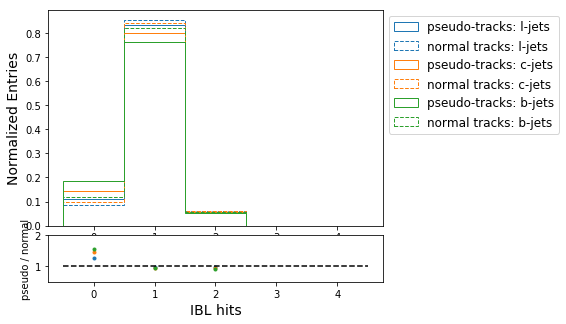

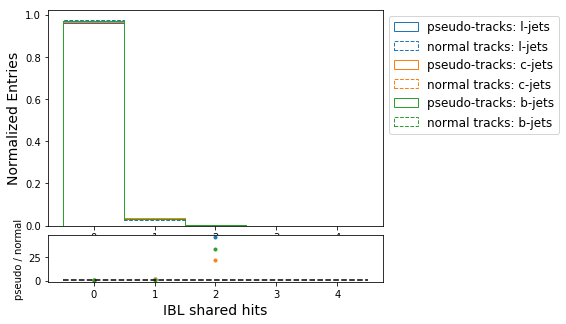

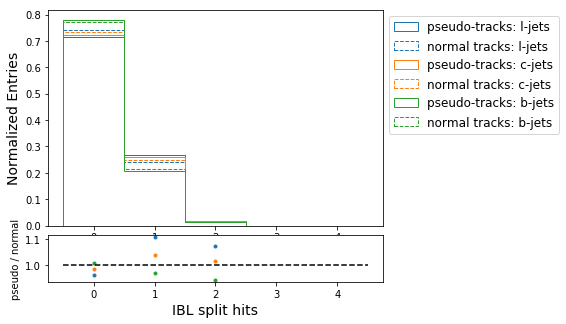

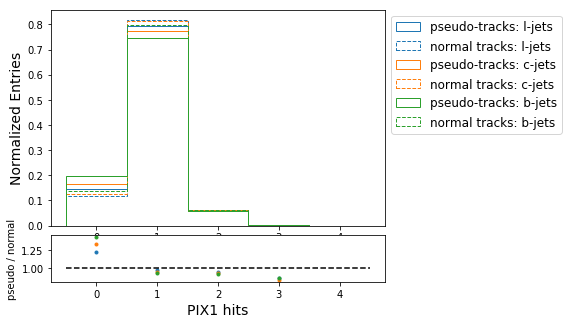

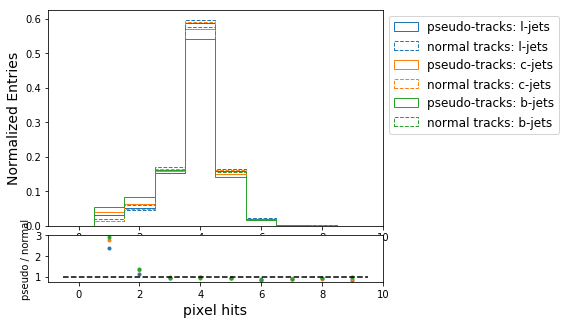

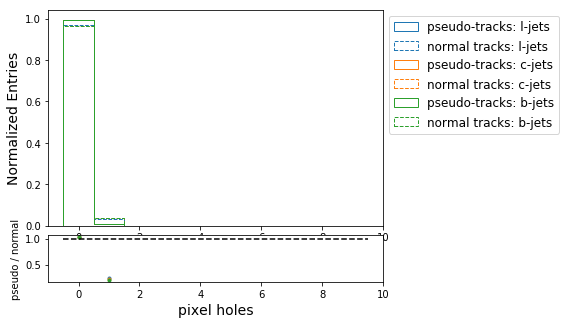

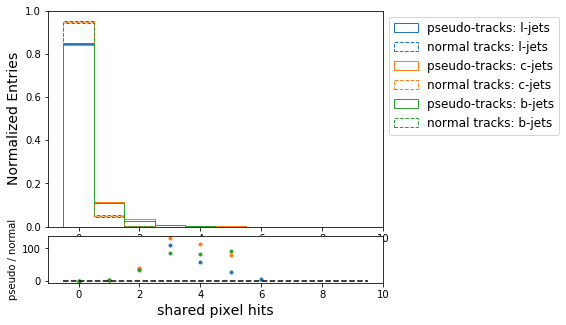

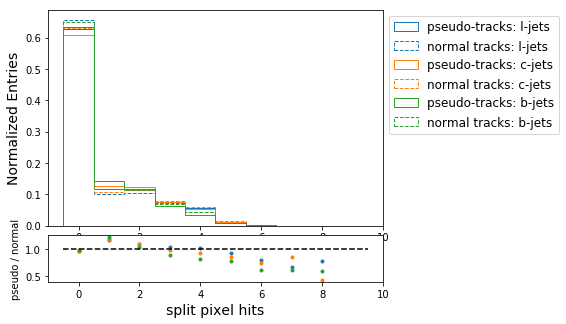

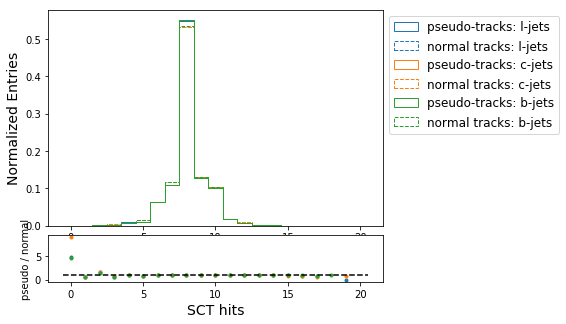

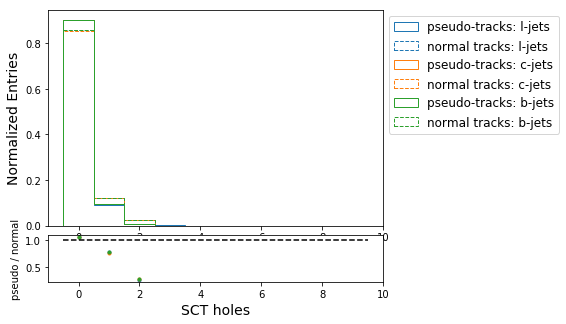

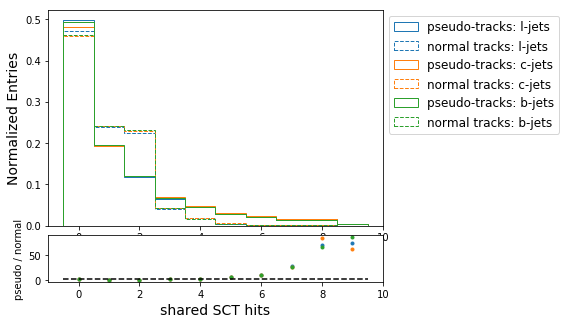

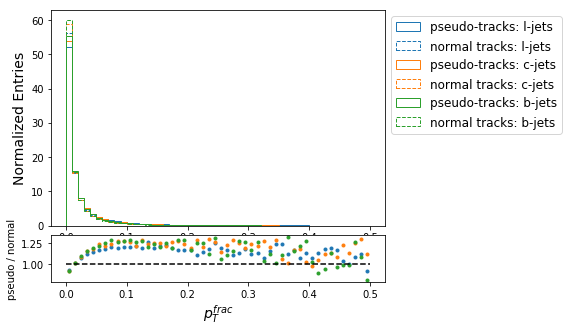

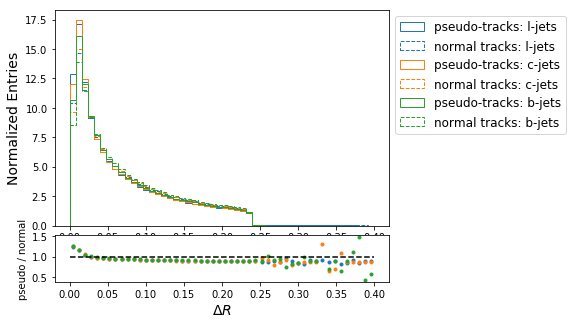

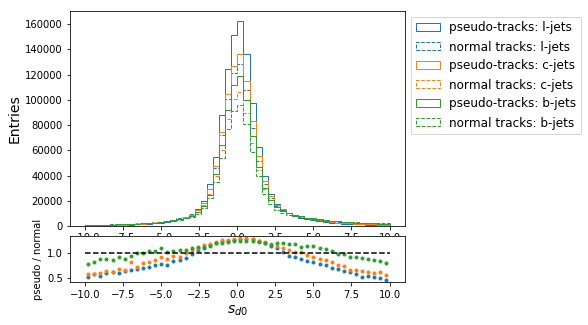

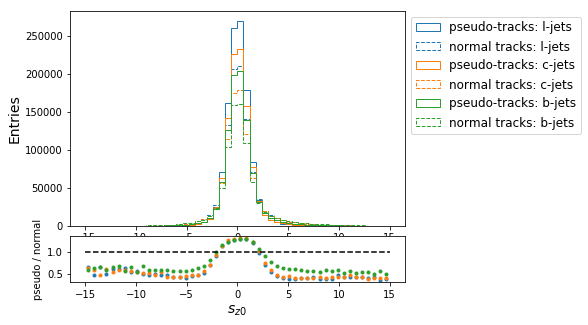

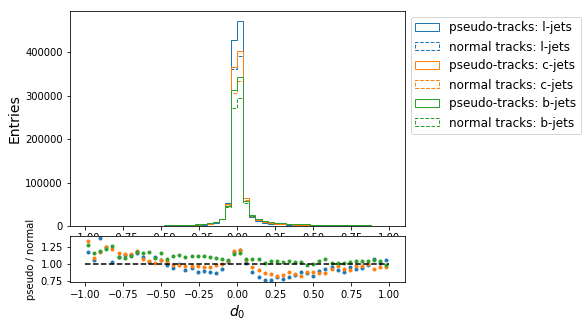

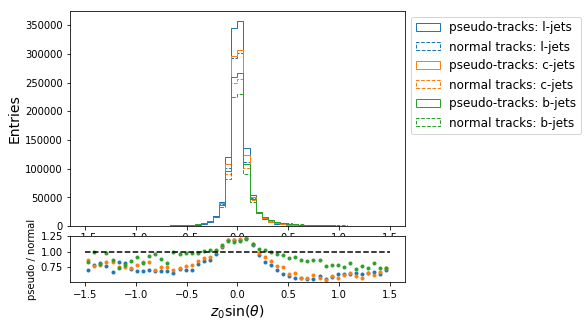

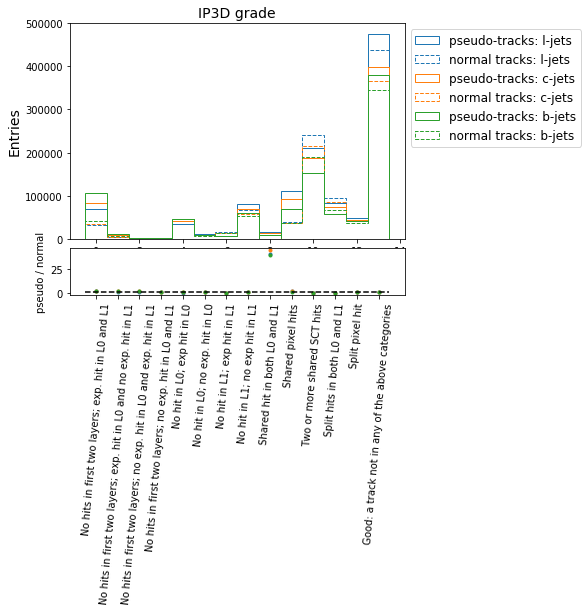

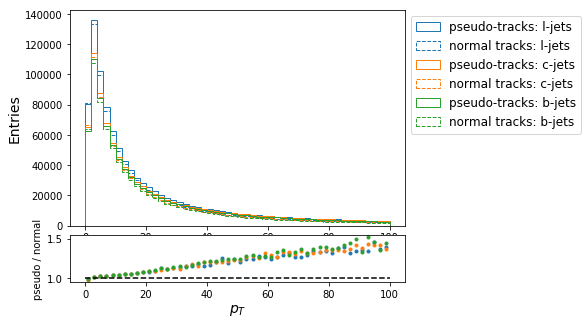

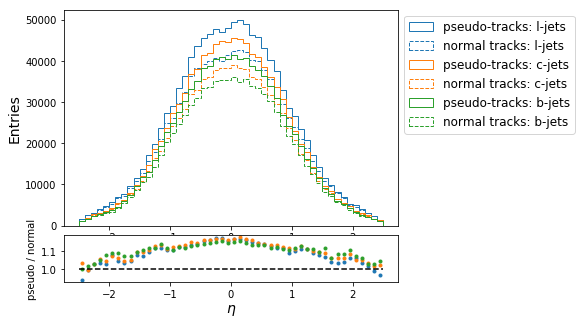

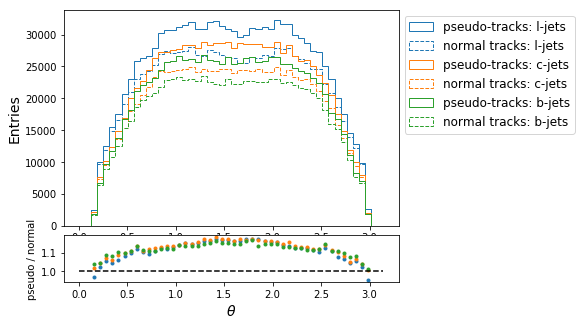

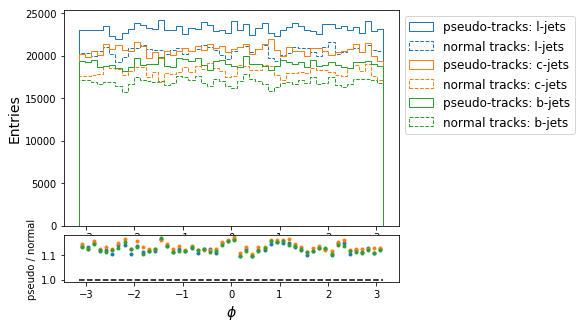

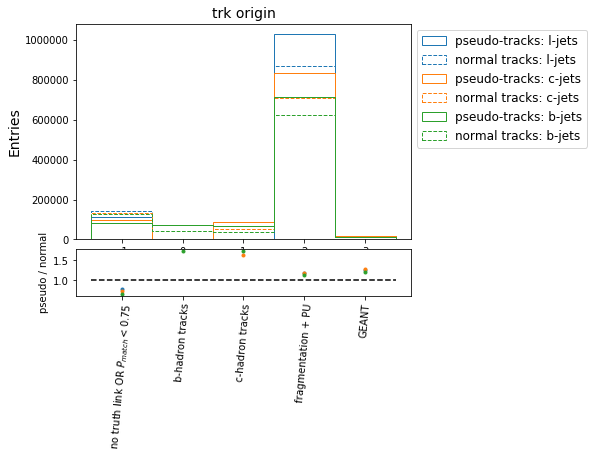

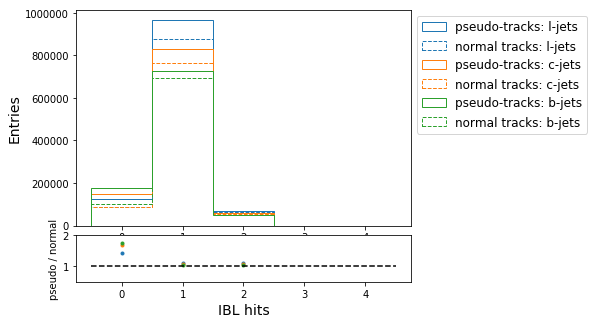

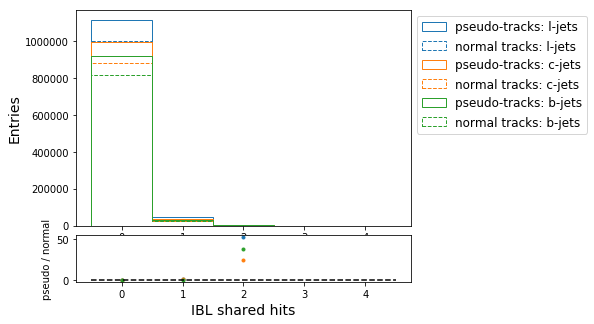

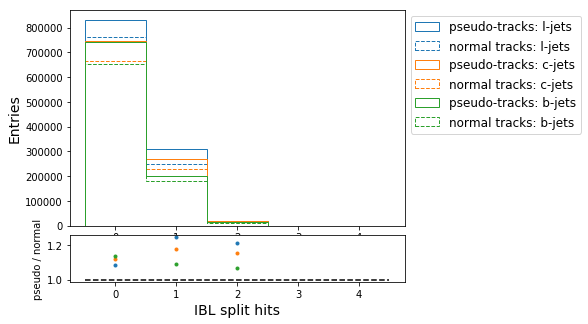

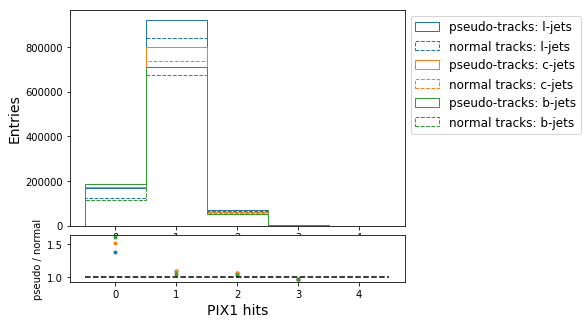

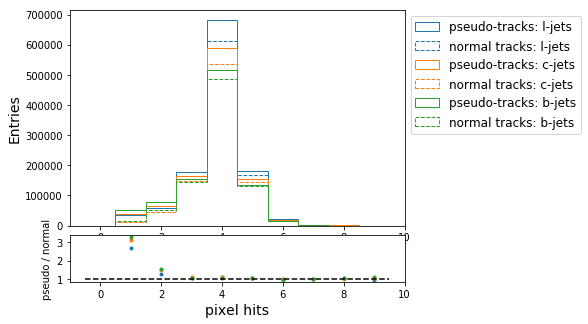

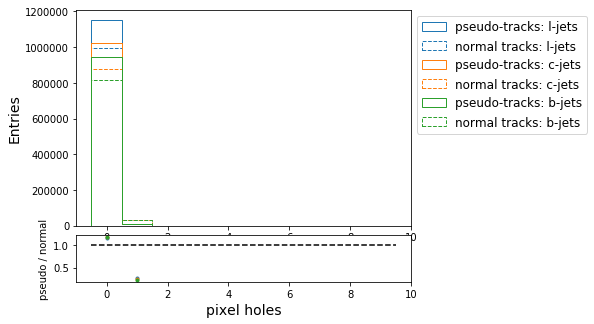

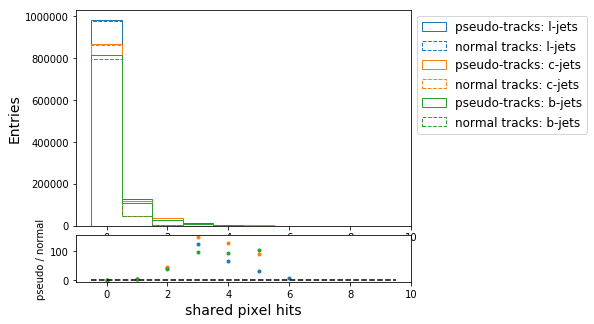

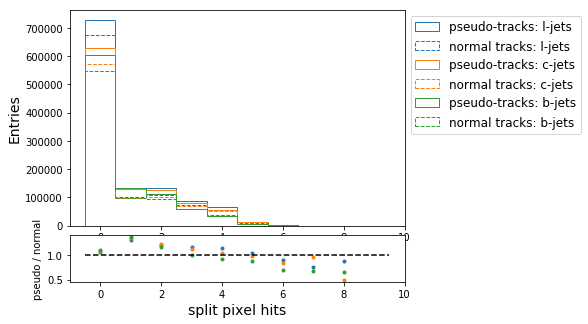

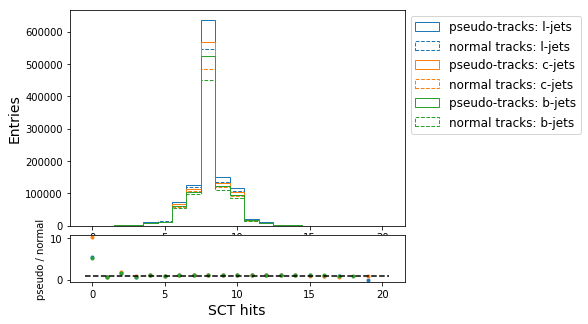

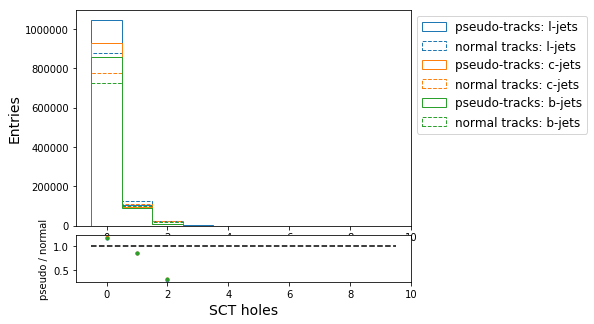

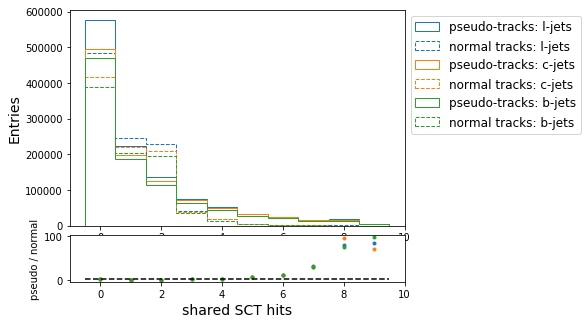

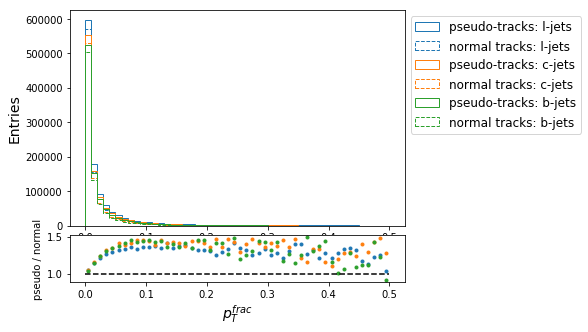

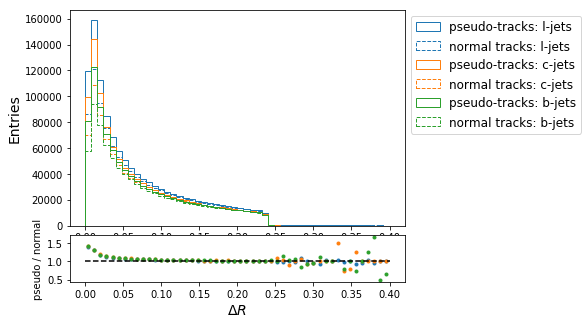

In [20]:
for density,title_prefix in zip([True, False], ['Normalized ','']):

    for j, (tvar, xlabel, nBins, myRange) in enumerate(zip(myVars, xlabels, var_bins, var_ranges)):

        # Access the non-masked trks in the jet for this trk feature
        var_PT = txr_PT.loc[:,:,tvar].values[mask_PT]
        var_NT = txr_NT.loc[:,:,tvar].values[mask_NT]

        fig = plt.figure(figsize=(6,5))
        gs = gridspec.GridSpec(5,1)
        ax1 = fig.add_subplot(gs[:4,0])
        ax2 = fig.add_subplot(gs[4:,0])

        for yi, flav in zip(range(3), ['l','c','b']):

            c = 'C{}'.format(yi)

            n_PT,edg,_ = ax1.hist(var_PT[ytrks_PT == yi],
                                  range=myRange,bins=nBins,
                                  histtype='step', density=density, 
                                  color=c, linestyle='-',
                                  label='pseudo-tracks: {}-jets'.format(flav))
            n_NT,edg,_ = ax1.hist(var_NT[ytrks_NT == yi],
                                  range=myRange,bins=nBins,
                                  histtype='step', density=density, 
                                  color=c, linestyle='--',
                                  label='normal tracks: {}-jets'.format(flav))

            ax2.plot(0.5 * (edg[:-1]+edg[1:]), n_PT / n_NT, 
                     color=c, marker='.', linewidth=0)

        ax1.legend(bbox_to_anchor=(1,1),fontsize=12)
        ax1.set_ylabel(title_prefix+'Entries',fontsize=14)

        if tvar in catLabels.keys():
            ax2.set_xticks(0.5 * (edg[:-1]+edg[1:]))
            ax2.set_xticklabels(catLabels[tvar],rotation=85)
            ax1.set_title(xlabel,fontsize=14)
        else:
            ax2.set_xlabel(xlabel,fontsize=14) 

        ax2.set_ylabel('pseudo / normal')

        if tvar == 'nInnHits':
            ax2.set_ylim(0.5,2)
        
        ax2.plot([edg[0],edg[-1]],[1]*2,'k--')

        plt.savefig('{}/{}{}.pdf'.format(figDir,tvar,'_norm' if density else ''),bbox_inches='tight')

        plt.show()

Follow-up, is $\Delta R$ w/r.t the calibrated or uncalibrated jet? Should be easy enough to check.

**Let's look at the resolutions too!**

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


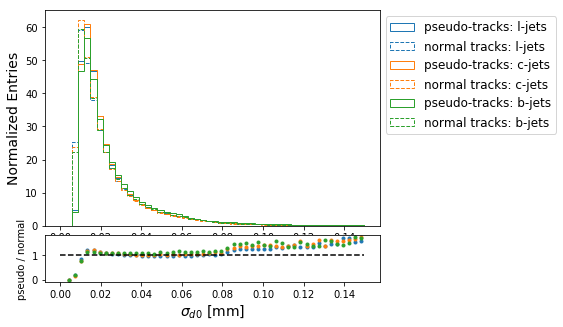

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


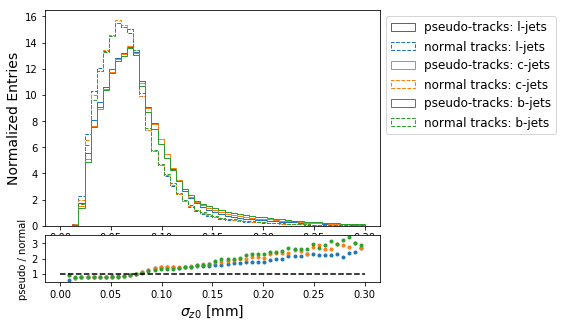

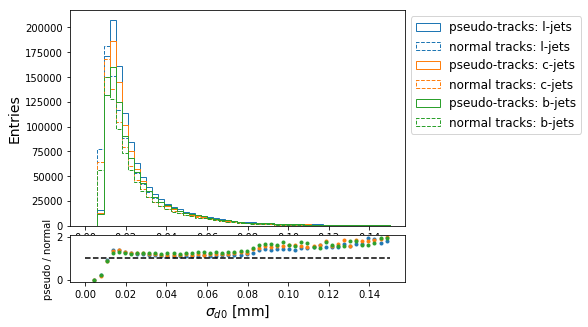

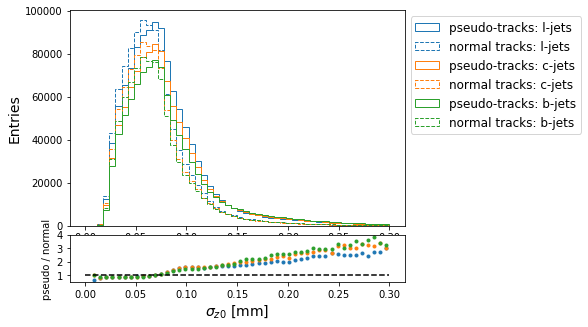

In [21]:
nBins = 50
for density,title_prefix in zip([True,False],['Normalized ','']):
    for proj, myRange in zip(['d','z'],[(0,0.15),(0,0.3)]):

        # Get the resolutions
        IP = 'ip3d_{}0'.format(proj)
        significance  = 's{}0'.format(proj)
        sigma_PT = txr_PT.loc[:,:,IP].values[mask_PT] / txr_PT.loc[:,:,significance].values[mask_PT]
        sigma_NT = txr_NT.loc[:,:,IP].values[mask_NT] / txr_NT.loc[:,:,significance].values[mask_NT]

        fig = plt.figure(figsize=(6,5))
        gs = gridspec.GridSpec(5,1)
        ax1 = fig.add_subplot(gs[:4,0])
        ax2 = fig.add_subplot(gs[4:,0])

        for yi, flav in zip(range(3), ['l','c','b']):

            c = 'C{}'.format(yi)

            n_PT,edg,_ = ax1.hist(sigma_PT[ytrks_PT == yi],
                                  bins=nBins,range=myRange,
                                  histtype='step', density=density, 
                                  color=c, linestyle='-',
                                  label='pseudo-tracks: {}-jets'.format(flav))
            n_NT,edg,_ = ax1.hist(sigma_NT[ytrks_NT == yi],
                                  bins=nBins,range=myRange,
                                  histtype='step', density=density, 
                                  color=c, linestyle='--',
                                  label='normal tracks: {}-jets'.format(flav))

            ax2.plot(0.5 * (edg[:-1]+edg[1:]), n_PT / n_NT, 
                     color=c, marker='.', linewidth=0)

        ax1.legend(bbox_to_anchor=(1,1),fontsize=12)
        ax1.set_ylabel(title_prefix+'Entries',fontsize=14)

        ax2.set_xlabel(r'$\sigma_{'+proj+'0}$ [mm]',fontsize=14)         
        ax2.set_ylabel('pseudo / normal')

        ax2.plot([edg[0],edg[-1]],[1]*2,'k--')

        plt.savefig('{}/{}0_err{}.pdf'.format(figDir,proj,'_norm' if density else ''),bbox_inches='tight')
        
        plt.show()


## I think for some of these variables, the log scale might be more useful!

In [22]:
logVars = ['sd0', 'sz0', 'ip3d_d0', 'ip3d_z0', 
          'pt', 'ptfrac', 'dr']

logXlabels = ['$s_{d0}$', '$s_{z0}$', '$d_0$ [mm]', r'$z_0 \sin (\theta)$ [mm]', 
           '$p_T$ [GeV]', '$p_T^{frac}$', '$\Delta R$']

logBins = [50] * len(logVars) 

logRanges = [(-15,15), (-15,15), (-1,1), (-1.5,1.5),
              (0,13000), (0,0.2), (0, .4)]

logYmins = [100,50,100,100,10,500,1]

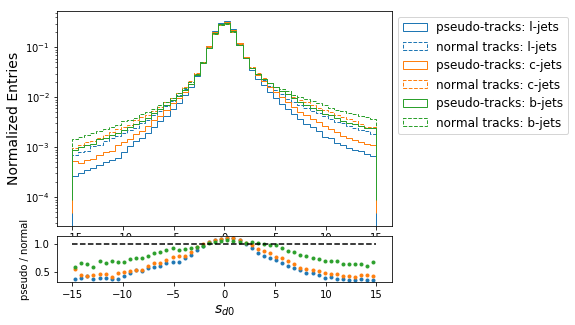

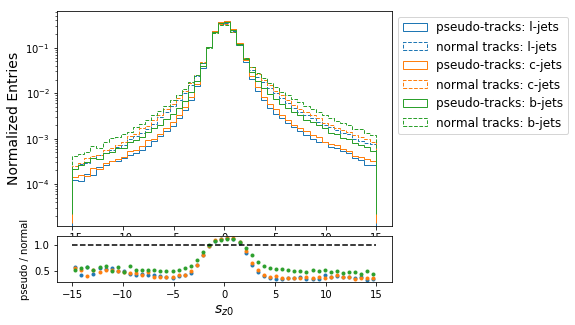

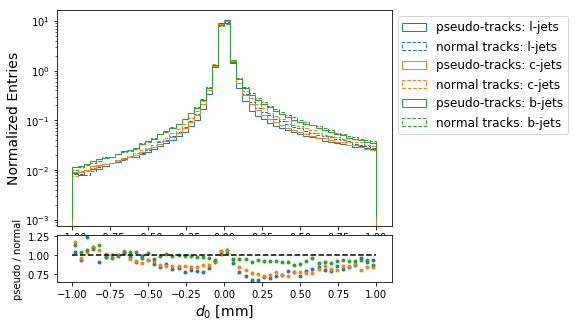

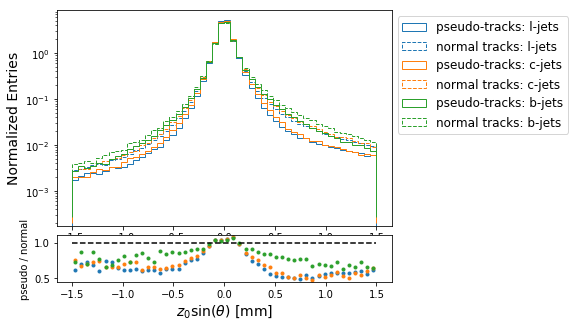

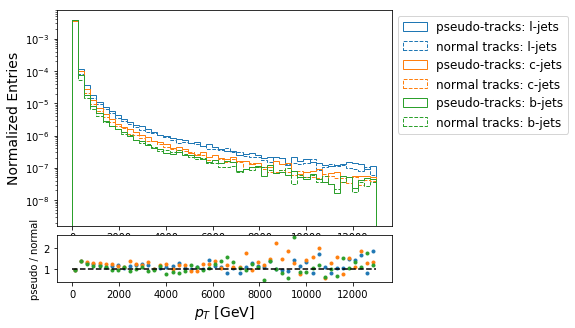

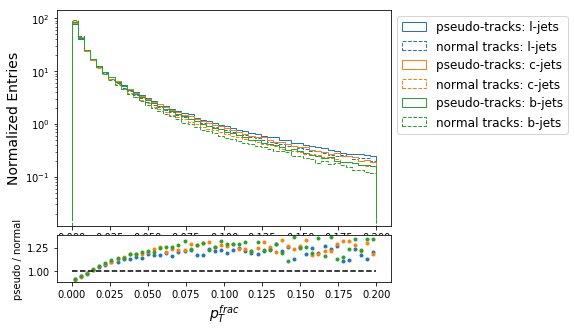

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


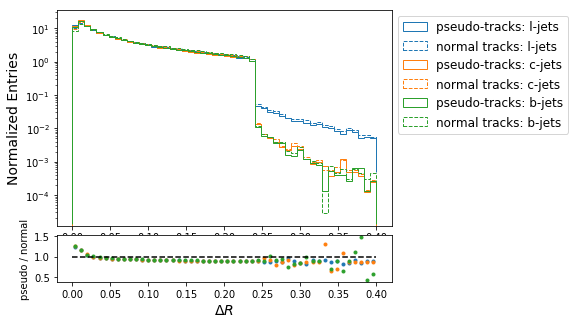

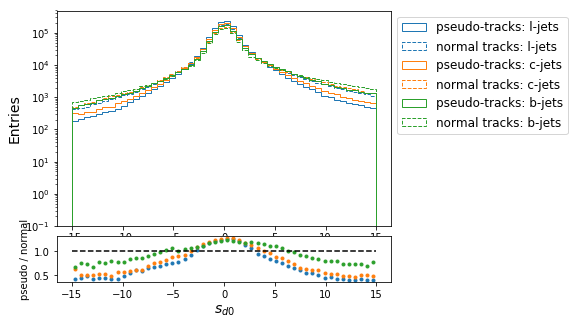

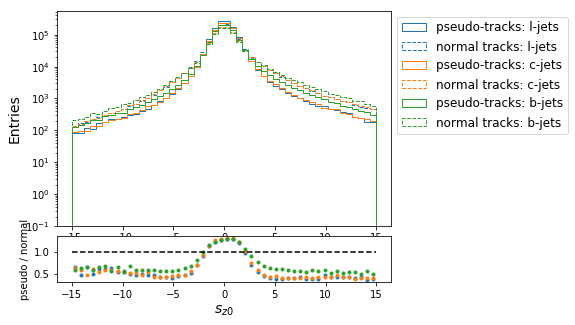

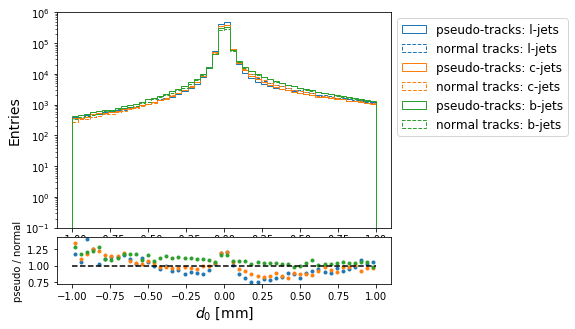

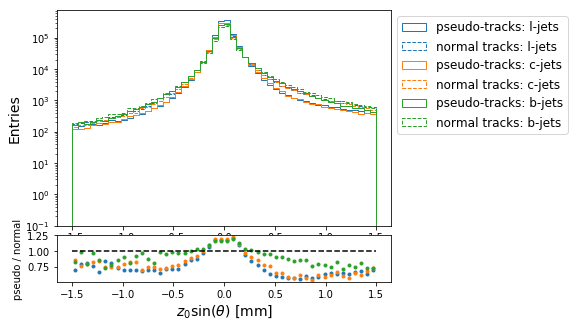

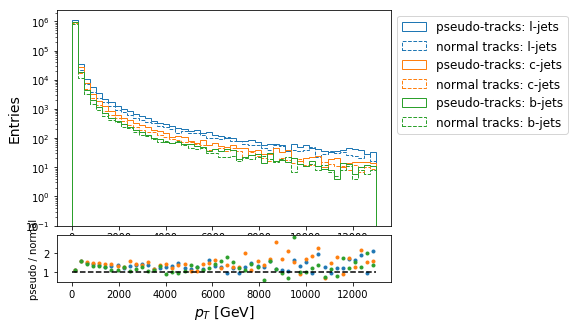

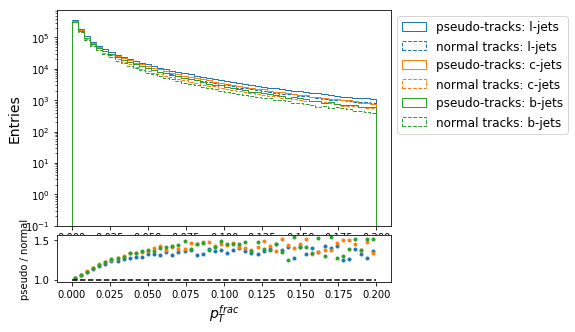

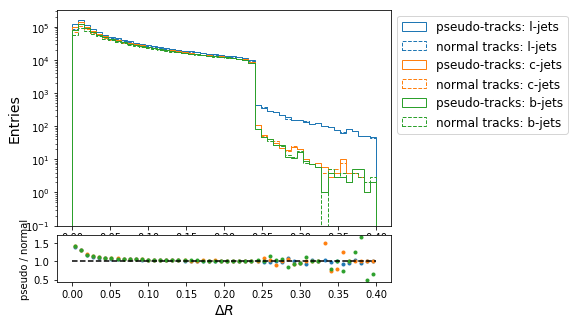

In [23]:
for density,title_prefix in zip([True,False],['Normalized ','']):
    
    for j, (tvar, xlabel, nBins, myRange, ymin) in enumerate(zip(logVars, logXlabels, logBins, logRanges, logYmins)):

        # Access the non-masked trks in the jet for this trk feature
        var_PT = txr_PT.loc[:,:,tvar].values[mask_PT]
        var_NT = txr_NT.loc[:,:,tvar].values[mask_NT]

        fig = plt.figure(figsize=(6,5))
        gs = gridspec.GridSpec(5,1)
        ax1 = fig.add_subplot(gs[:4,0])
        ax2 = fig.add_subplot(gs[4:,0])#,sharex=ax1)
        #fig.subplots_adjust(hspace=0)

        for yi, flav in zip(range(3), ['l','c','b']):

            c = 'C{}'.format(yi)

            n_PT,edg,_ = ax1.hist(var_PT[ytrks_PT == yi],
                                  range=myRange,bins=nBins,
                                  histtype='step', log=True, 
                                  color=c, linestyle='-',density=density,
                                  label='pseudo-tracks: {}-jets'.format(flav))
            n_NT,edg,_ = ax1.hist(var_NT[ytrks_NT == yi],
                                  range=myRange,bins=nBins,
                                  histtype='step', log=True, 
                                  color=c, linestyle='--',density=density,
                                  label='normal tracks: {}-jets'.format(flav))

            ax2.plot(0.5 * (edg[:-1]+edg[1:]), n_PT / n_NT, 
                     color=c, marker='.', linewidth=0)

        ax1.legend(bbox_to_anchor=(1,1),fontsize=12)
        ax1.set_ylabel(title_prefix+'Entries',fontsize=14)
        _, ymax = ax1.get_ylim()
        #ax1.set_ylim(ymin,ymax)

        ax2.set_xlabel(xlabel,fontsize=14)     
        ax2.set_ylabel('pseudo / normal')

        ax2.plot([edg[0],edg[-1]],[1]*2,'k--')

        plt.savefig('{}/{}_log{}.pdf'.format(figDir,tvar,'_norm' if density else ''),bbox_inches='tight')
        
        plt.show()

**Note:** the pseudo-track sample can't have fake tracks.

Ok, I have *so* many questions, but I *think* those are the basic distributions that I want to look at, and next I can make ratio plots, clean stuff up, and look at the algorithm performance!!

## Event and topology variables

Just to get an understanding of the topology of our event, I think it would be nice to see the 



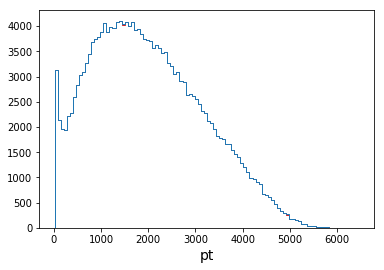

In [24]:
c = 'pt'
plt.figure()
plt.hist([jdf_PT[c],jdf_NT[c]],100,histtype='step',
         color=['C0','C3'],label=['pseudo-tracks','normal tracks'])
plt.xlabel(c,fontsize=14)
plt.show()

I think it's interesting that this double peaked structure shows up in the Extended Z' PFlow sample as well, it was something that I had seen before for VR, and was not sure about, so I think this is probably due to choosing the leading two jets in $p_T$.

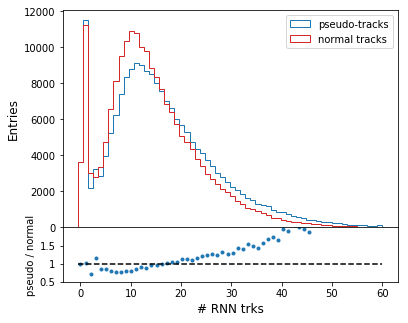

In [25]:
fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(5,1)
ax1 = fig.add_subplot(gs[:4,0])
ax2 = fig.add_subplot(gs[4:,0],sharex=ax1)
fig.subplots_adjust(hspace=0)

ns = []

xrange=(-0.5,60)
nBins = int(xrange[1]-xrange[0])

for df, c, label in zip([jdf_PT,jdf_NT],['C0','C3'], ['pseudo-tracks','normal tracks']):

    n, edg, _ = ax1.hist(df['ip3d_ntrk'],nBins,xrange,density=density,
                         histtype='step',color=c,label=label)
    ns.append(n)

ax1.legend()
ax1.set_ylabel('Entries',fontsize=12)

ax2.plot(0.5 * (edg[:-1]+edg[1:]), ns[0] / ns[1],marker='.',linewidth=0)
ax2.set_xlabel('# RNN trks',fontsize=12)
ax2.set_ylabel('pseudo / normal',fontsize=10)

yticks = [0.5,1,1.5]
ax2.set_yticks(yticks)
ax2.set_yticklabels([str(yi) for yi in yticks])

ax2.set_ylim(0.5,2)
ax2.plot(xrange,[1]*2,'k--')

plt.savefig('{}/ip3d_ntrk.pdf'.format(figDir),bbox_inches='tight')

plt.show()

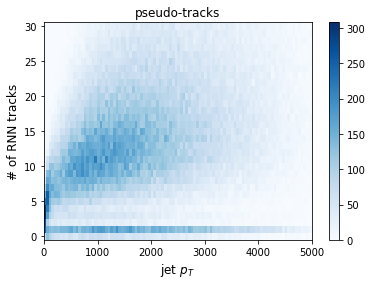

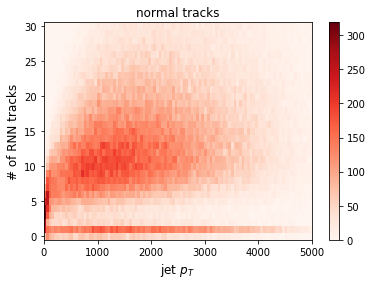

In [26]:
for df, cmap, label, tag in zip([jdf_PT,jdf_NT],['Blues','Reds'], ['pseudo-tracks','normal tracks'],['PT','NT']):

    plt.figure()
    plt.hist2d(df['pt'],df['ip3d_ntrk'],[100,31],[(0,5e3),(-0.5,30.5)],
               cmap=cmap)#,norm=LogNorm())
    plt.colorbar()
    plt.xlabel('jet $p_T$',fontsize=12)
    plt.ylabel('# of RNN tracks',fontsize=12)
    plt.title(label)
    
    plt.savefig('../../figures/mu40_Topo_Zprime_5TeV_2lead_{}/ip3d_ntrk_vs_jpt.pdf'.format(tag),bbox_inches='tight')
    

Maybe a more useful way to do this would be to plot the # of tracks in each of the $p_T$ bins.

**Next:** Let's compare the jet composition for l,c,b jets!

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


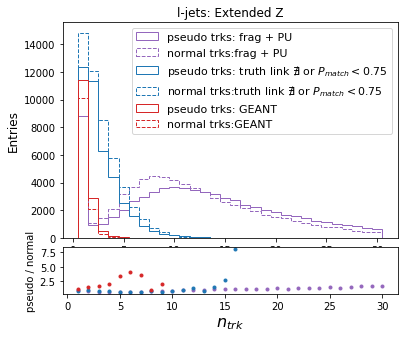

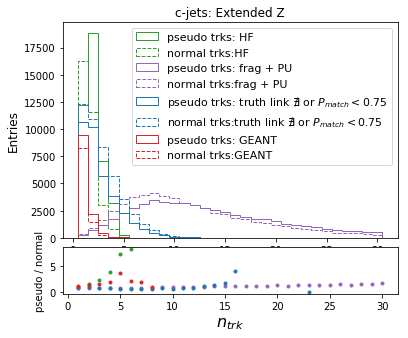

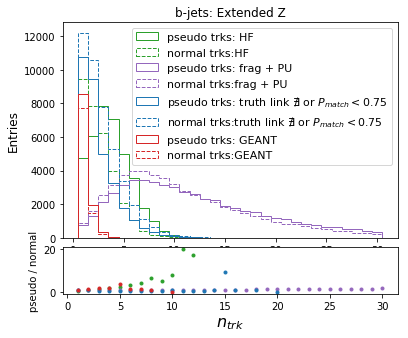

In [27]:
nBins = 30
myRange = (0.5,30.5)

orig_tags = ['HF','frag','PU','GEANT']
orig_labels = {'HF':'HF',
               'frag':'frag + PU',
               'PU':r'truth link $\nexists$ or $P_{match} < 0.75$',
               'GEANT':'GEANT'}

for pdg,flav in zip([0,4,5],['l','c','b']):

    fig = plt.figure(figsize=(6,5))
    gs = gridspec.GridSpec(5,1)
    ax1 = fig.add_subplot(gs[:4,0])
    ax2 = fig.add_subplot(gs[4:,0])
    
    
    
    for orig_tag, c in zip(orig_tags,['C2','C4','C0','C3']):

        if (pdg == 0) and (orig_tag == 'HF'):
            continue

        key = 'ntrk_'+orig_tag

        
        n_PT,edg,_ = ax1.hist(jdf_PT.loc[jdf_PT.LabDr_HadF == pdg,key],
                              bins=nBins,range=myRange,
                              histtype='step', #log=True, 
                              color=c, linestyle='-',
                              label='pseudo trks: '+orig_labels[orig_tag])
        n_NT,edg,_ = ax1.hist(jdf_NT.loc[jdf_NT.LabDr_HadF == pdg,key],
                              bins=nBins,range=myRange,
                              histtype='step', #log=True, 
                              color=c, linestyle='--',
                              label='normal trks:'+orig_labels[orig_tag])
        
        ax2.plot(0.5 * (edg[:-1]+edg[1:]), n_PT / n_NT, 
                 color=c, marker='.', linewidth=0)
            
            
        #plt.xlim(myRange)
        ax2.set_xlabel('$n_{trk}$',fontsize=16)
        ax2.set_ylabel('pseudo / normal',fontsize=10)
        ax1.legend(fontsize=11)
        ax1.set_title(flav+'-jets: Extended Z')
        ax1.set_ylabel('Entries',fontsize=12)
        
        plt.savefig('{}/{}-jets_ip3d_ntrks_orig.pdf'.format(figDir,flav),bbox_inches='tight')
        
plt.show()

**Another interesting thing to study:**

- I think it would be super fun to look @ the evolution of HF and fragmentation tracks w/r.t. the jet $p_T$.


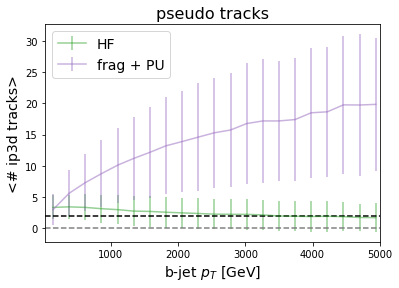

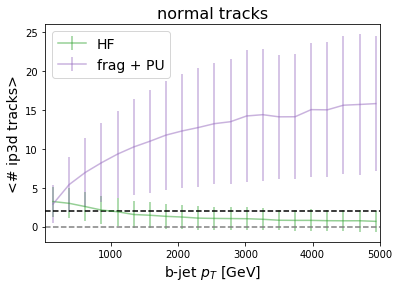

In [28]:
mus = {k:[] for k in orig_tags}
sds = {k:[] for k in orig_tags}

start, stop, step = 20, 5e3, 240 
pT_edges = np.arange(start, stop+step, step)
mid_pt = (pT_edges[1:]+pT_edges[:-1]) / 2

nEdgs = pT_edges.shape[0]

for jdf, title, tag in zip(jet_dfs,['pseudo tracks','normal tracks'],['PT','NT']):
    
    
    indices = np.digitize(jdf['pt'], pT_edges)
    
    for orig_tag in orig_tags:
        
        key = 'ntrk_' + orig_tag
        mus[orig_tag].append([jdf.loc[(indices==i)&(jdf['LabDr_HadF']==5),key].mean() for i in range(1,nEdgs)])
        sds[orig_tag].append([jdf.loc[(indices==i)&(jdf['LabDr_HadF']==5),key].std()  for i in range(1,nEdgs)])
    
    plt.figure()
    plt.errorbar(mid_pt, mus['HF'][-1],  sds['HF'][-1],   label='HF',  color='C2',alpha=0.5)
    plt.errorbar(mid_pt, mus['frag'][-1], sds['frag'][-1],label='frag + PU',color='C4',alpha=0.5)

    plt.plot([start,stop],[0,0],'grey',linestyle='--')
    plt.plot([start,stop],[2,2],'k--')

    plt.xlim(start,stop)
    plt.xlabel('b-jet $p_T$ [GeV]', fontsize = 14)
    plt.ylabel('<# ip3d tracks>', fontsize = 14)
    plt.legend(loc='upper left',fontsize=14)
    plt.title(title,fontsize=16)
    
    plt.savefig('../../figures/mu40_Topo_Zprime_5TeV_2lead_{}/RNNIP_inputs/b-jets_ip3d_ntrks_HF_Pmatch>0.75_vs_jpt.pdf'.format(tag),bbox_inches='tight')
            
    plt.show()


In [29]:
figDir

'../../figures/mu40_Topo_Zprime_5TeV_2lead_PT/RNNIP_inputs'

Without error bars, it might also be super interesting to compare the types of tracks that evolve with jet $p_T$.

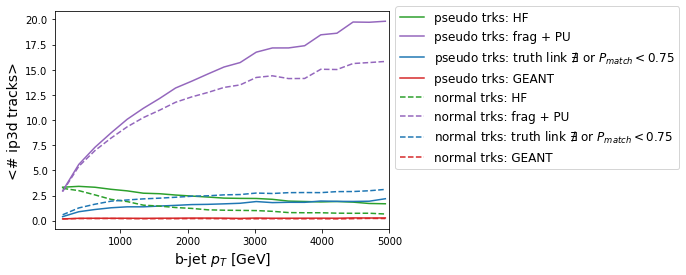

In [30]:
for i, trkType,l in zip(range(2), ['pseudo','normal'], ['-','--']):
    
    for orig_tag, c in zip(orig_tags,['C2','C4','C0','C3']):
        
        label = "{} trks: {}".format(trkType, orig_labels[orig_tag])
        plt.plot(mid_pt,mus[orig_tag][i],label=label,color=c,linestyle=l)
        
plt.xlim(start,stop)
plt.xlabel('b-jet $p_T$ [GeV]', fontsize = 14)
plt.ylabel('<# ip3d tracks>', fontsize = 14)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=12)

plt.savefig('{}/b-jets_ip3d_ntrks_orig_vs_jpt.pdf'.format(figDir),bbox_inches='tight')
plt.show()